# Explore here - Problem Statement | Background

**Predicting Diabetes**

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict based on diagnostic measures whether or not a patient has diabetes.


- **Pregnancies**. Number of pregnancies of the patient (numeric)
- **Glucose**. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- **BloodPressure**. Diastolic blood pressure (measured in mm Hg) (numeric)
- **SkinThickness**. Triceps skinfold thickness (measured in mm) (numeric)
- **Insulin**. 2-hour serum insulin (measured in mu U/ml) (numeric)
- **BMI**. Body mass index (numeric)
- **8DiabetesPedigreeFunction**. Diabetes Pedigree Function (numeric)
- **Age**. Age of patient (numeric)
- **Outcome**. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

### Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from pickle import dump

### Read CSV

In [ ]:
#import csv file
tot_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

# Set display options to show all columns (None means unlimited)
pd.set_option('display.max_columns', None)

#Read csv file and display intial rows
tot_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
tot_data = tot_data.drop_duplicates().reset_index(drop = True)

# display shape
tot_data.shape

(768, 9)

# Look at numerical variables

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

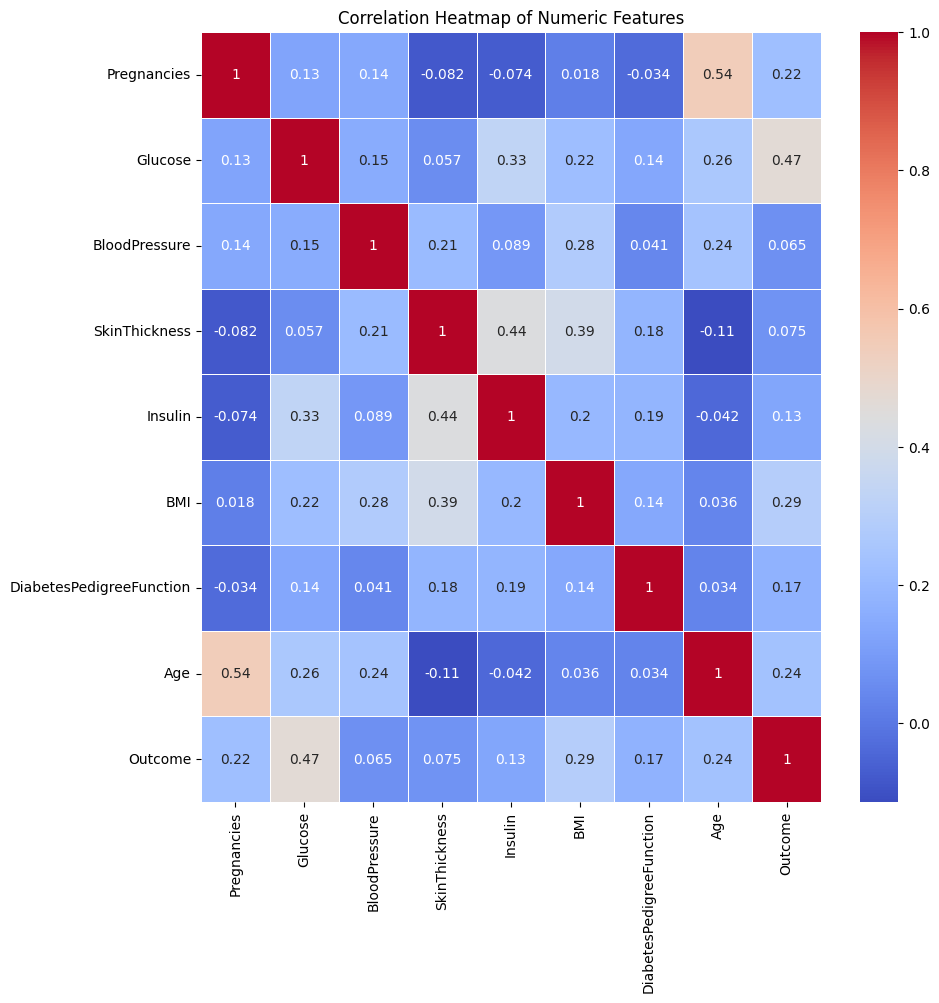

In [ ]:
# Filter the DataFrame to include numeric columns
numeric_df = tot_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap for the entire correlation matrix
plt.figure(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')

In [ ]:
# List of keywords to filter out
keywords = ['BloodPressure']
#keywords = ['SkinThickness' ]
#keywords = ['BloodPressure','SkinThickness' ]
# Finding columns that contain any of the keywords
columns_to_drop = [col for col in tot_data.columns if any(keyword in col for keyword in keywords)]

# Dropping these columns from the DataFrame
tot_data = tot_data.drop(columns=columns_to_drop)

### Split the data

In [ ]:
X = tot_data.drop(columns=['Outcome'])
y = tot_data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0.0,0.304,21
618,9,112,24,0,28.2,1.282,50
346,1,139,19,83,28.7,0.654,22
294,0,161,0,0,21.9,0.254,65
231,6,134,37,370,46.2,0.238,46


In [ ]:
X_train.shape

(614, 7)

#### Initialization and training of the model

In [ ]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

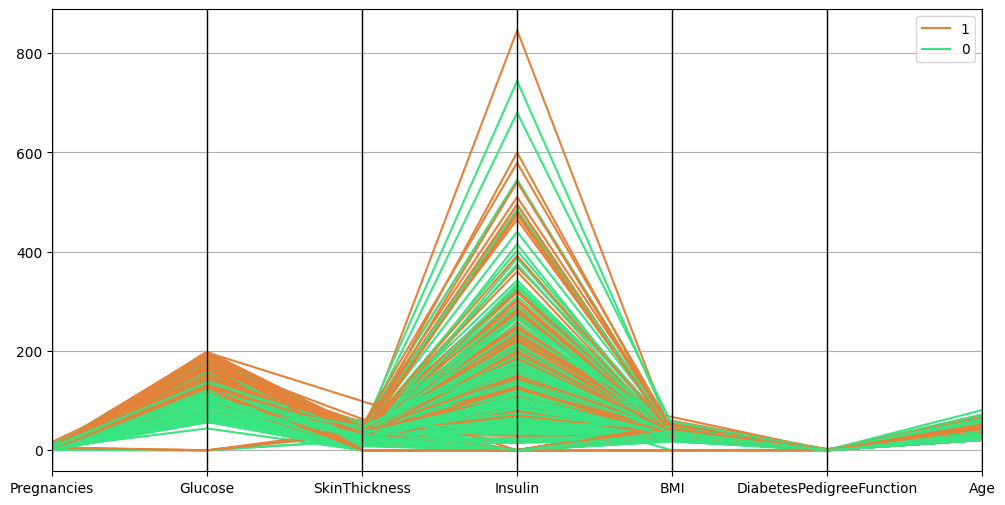

In [ ]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(tot_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.show()

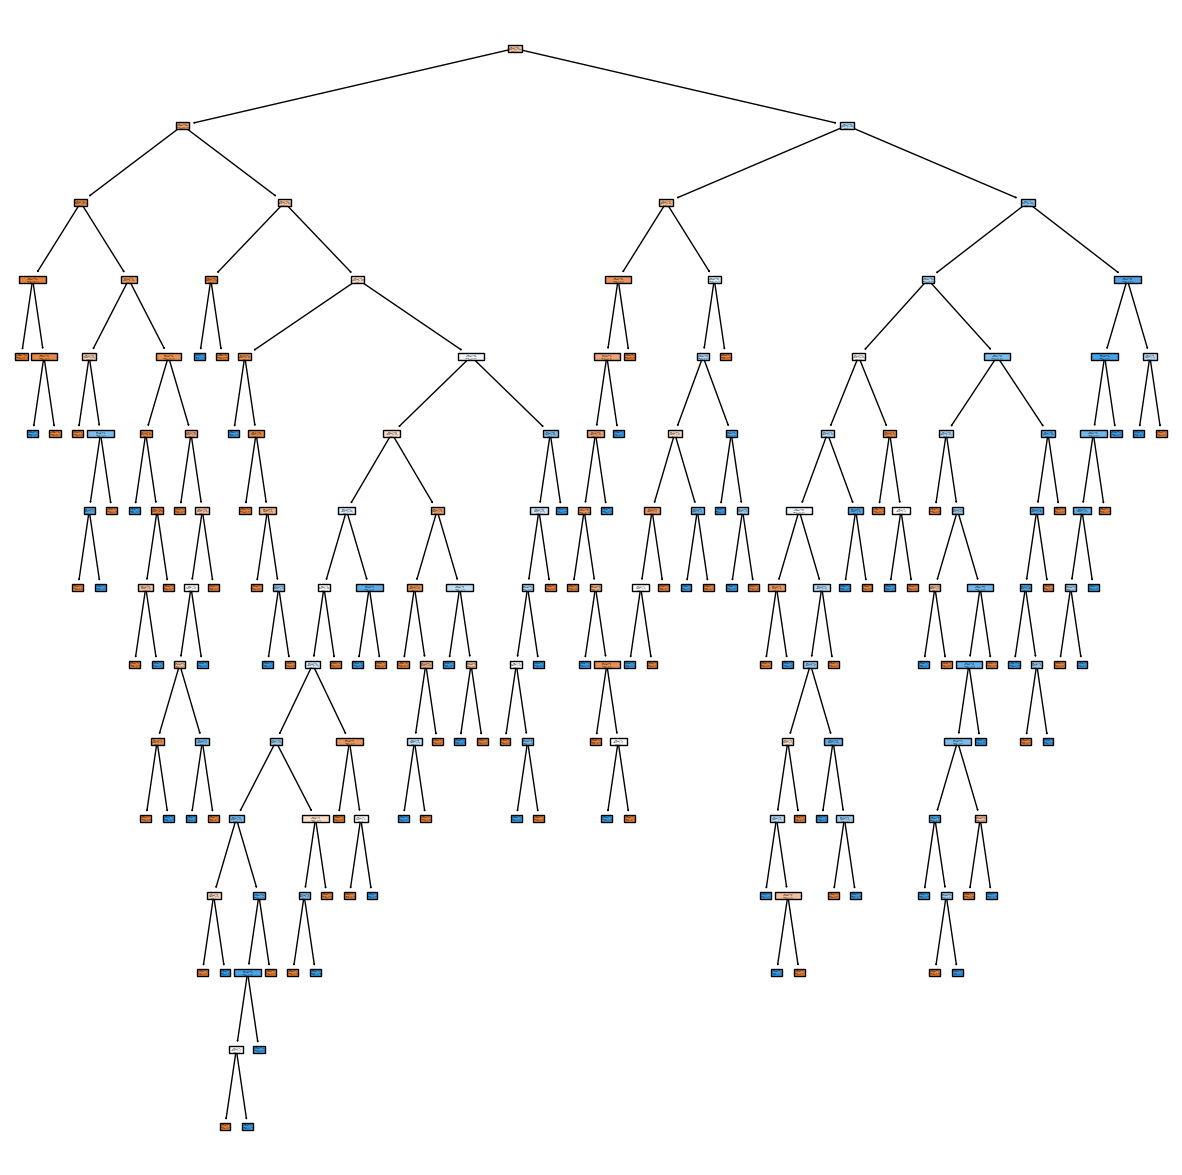

In [ ]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()

#### Model prediction


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate metrics
accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)

# Print the results
print(f'Model Baseline Accuracy: {accuracy}')
print(f'Model Baseline Precision: {precision}')
print(f'Model Baseline Recall: {recall}')
print(f'Model Baseline F1 Score: {f1}')

Model Baseline Accuracy: 0.78571
Model Baseline Precision: 0.66176
Model Baseline Recall: 0.81818
Model Baseline F1 Score: 0.73171


In [ ]:
# Define the parameters grid for hyperparameter tuning, including 'criterion'
param_grid = {
    'criterion': ['entropy'],  # Add criterion to the grid
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
 }

# Instantiate GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=7, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_model = DecisionTreeClassifier(**best_params, random_state=50)
best_model.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred = best_model.predict(X_test)

# Calculate and round the metrics
accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred, average='binary'), 5)  # Adjust 'average' as needed
recall = round(recall_score(y_test, y_pred, average='binary'), 5)  # Adjust 'average' as needed
f1 = round(f1_score(y_test, y_pred, average='binary'), 5)  # Adjust 'average' as needed

# Print the rounded metrics
print(f'Model Accuracy: {accuracy}')
print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')
print(f'Model F1 Score: {f1}')


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Model Accuracy: 0.77922
Model Precision: 0.70588
Model Recall: 0.65455
Model F1 Score: 0.67925


Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC AUC Score: 0.8032660442355425
Model Accuracy: 0.76623
Model Precision: 0.68627
Model Recall: 0.63636
Model F1 Score: 0.66038
Model ROC AUC: 0.80376


<module 'matplotlib.pyplot' from '/home/vscode/.local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

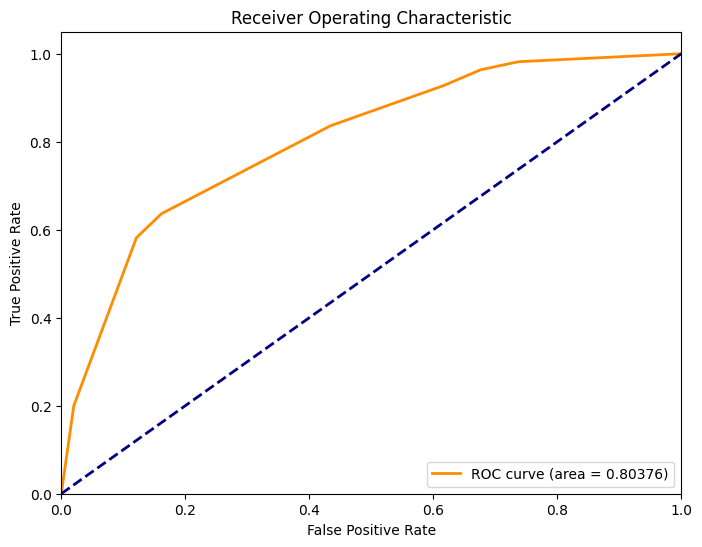

In [ ]:
# Instantiate GridSearchCV with 'roc_auc' scoring for imbalanced datasets
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=7, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score}")

# Train the model with the best parameters
best_model = DecisionTreeClassifier(**best_params, random_state=90)
best_model.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]  # probabilities for positive class

# Calculate metrics
accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred, average='binary'), 5)
recall = round(recall_score(y_test, y_pred, average='binary'), 5)
f1 = round(f1_score(y_test, y_pred, average='binary'), 5)
roc_auc = round(auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1]), 5)

# Print metrics
print(f'Model Accuracy: {accuracy}')
print(f'Model Precision: {precision}')
print(f'Model Recall: {recall}')
print(f'Model F1 Score: {f1}')
print(f'Model ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt

#### Save Model

In [ ]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))